In [13]:
%load_ext autoreload
%autoreload

from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, Reshape,Flatten,UpSampling2D,concatenate, Activation

import numpy as np
import matplotlib.pyplot as plt

from constants import INPUT_SHAPE
from conversion import read_room2class, get_class2color, FloorplanRaw, FloorplanSVG, read_room2class_condensed

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
model = load_model("room_type_model.h5")

In [5]:
# Mappings for dataset
room2class = read_room2class_condensed("room_types_succinct.txt")
class2room = {v: k for k, v in room2class.items()}
class2color = get_class2color(max(room2class.values())+1)

n_classes = max(room2class.values())+1

In [6]:
dataset_dir = "./data/cubicasa5k"
batch_size = 32

def plot_training_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1,len(accuracy)+1)

    plt.figure()
    plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.show()

In [7]:
# Load data
train_X = np.load(dataset_dir + "/train_inputs.npy")
train_y = np.load(dataset_dir + "/train_labels.npy")
train_y = to_categorical(train_y, num_classes=n_classes, dtype=np.int8)

In [8]:
val_X = np.load(dataset_dir + "/val_inputs.npy")
val_y = np.load(dataset_dir + "/val_labels.npy")
val_y = to_categorical(val_y, num_classes=n_classes, dtype=np.int8)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


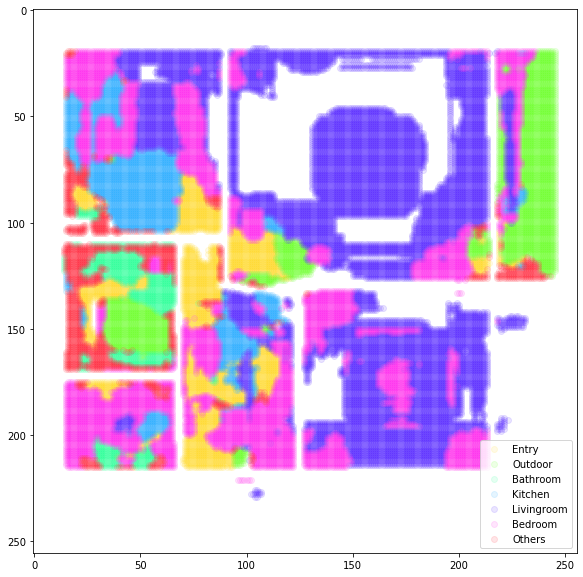

In [15]:
# Try out (blank still T-T)
idx = 2
trial = val_X[idx]
result = model.predict(np.expand_dims(trial, axis=0))[0]
FloorplanSVG.show_map(np.argmax(result, axis=-1), 255*np.ones_like(trial), class2color, class2room)

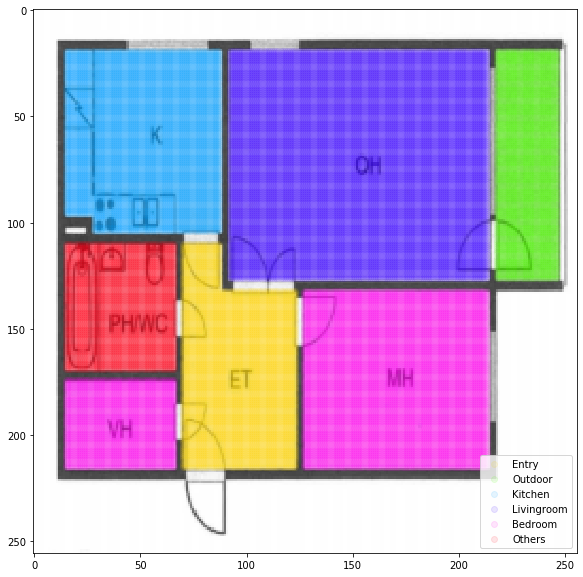

In [16]:
# groundtruth
gt = np.argmax(val_y[idx], axis=-1)
FloorplanSVG.show_map(gt, trial, class2color, class2room)